Code to generate WordCloud. Run in Google CoLab due to issues with WordCloud library locally.

In [76]:
# Run for use in CoLab
!pip install pandas

In [77]:
# Run for use in CoLab
!pip install matplotlib

In [78]:
# Run for use in CoLab
!pip install wordcloud

In [79]:
# Import dependencies
import os
import csv
import re
import random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files
from wordcloud import WordCloud

In [80]:
# Define CSV file location for use in CoLab
from google.colab import files
uploaded = files.upload()

Saving final_ind_post_data_df.csv to final_ind_post_data_df (2).csv


In [81]:
# Read the CSV file into a DataFrame
file_path = 'final_ind_post_data_df.csv'
wordcloud_df = pd.read_csv(file_path)

wordcloud_df.head()

,Compound,Positive,Negative,Neutral,Text,Candidate,Year
0,0.4404,0.139,0.000,0.861,The question in this election: Who can put the...,Democrat,2016
1,0.0000,0.000,0.000,1.000,"Last night, Donald Trump said not paying taxes...",Democrat,2016
2,0.1850,0.165,0.102,0.733,Couldn't be more proud of @HillaryClinton. Her...,Democrat,2016
3,0.1376,0.128,0.101,0.771,"If we stand together, there's nothing we can't...",Democrat,2016
4,-0.6597,0.000,0.278,0.722,Both candidates were asked about how they'd co...,Democrat,2016


In [82]:
# Filter the DataFrame for rows where the candidate column is 'Democrat'
dem_df = wordcloud_df[wordcloud_df['Candidate'] == 'Democrat']

In [83]:
# Filter the DataFrame for rows where the candidate column is 'Democrat'
rep_df = wordcloud_df[wordcloud_df['Candidate'] == 'Republican']

In [84]:
# Combine all text entries into a single string
text_dem = ' '.join(dem_df['Text'].dropna())

In [85]:
# Combine all text entries into a single string
text_rep = ' '.join(rep_df['Text'].dropna())

In [86]:
# Create and generate a word cloud image
wordcloud_dem = WordCloud(width=800, height=400, background_color='white').generate(text_dem)

In [87]:
# Create and generate a word cloud image
wordcloud_rep = WordCloud(width=800, height=400, background_color='white').generate(text_rep)

In [88]:
# Extract words and their frequencies
word_freq_dem = wordcloud_dem.words_

In [89]:
# Extract words and their frequencies
word_freq_rep = wordcloud_rep.words_

In [90]:
# Define regex patterns to exclude words containing specific substrings
exclude_patterns = re.compile(r'\b(Trump|Donald|Biden|Joe|Kamala|Harris|https|t|co)\b', re.IGNORECASE)

In [91]:
# Filter words based on exclusion patterns
filtered_word_freq_dem = {word: freq for word, freq in word_freq_dem.items() if not exclude_patterns.search(word)}

In [92]:
# Filter words based on exclusion patterns
filtered_word_freq_rep = {word: freq for word, freq in word_freq_rep.items() if not exclude_patterns.search(word)}

In [93]:
# Sort words by frequency and take the top 200 for Democrats
top_words_dem = dict(sorted(filtered_word_freq_dem.items(), key=lambda item: item[1], reverse=True)[:200])

In [94]:
# Sort words by frequency and take the top 200 for Republicans
top_words_rep = dict(sorted(filtered_word_freq_rep.items(), key=lambda item: item[1], reverse=True)[:200])

In [95]:
# Combine top_words_dem and top_words_rep dictionaries
combined_words = top_words_dem.copy()  # Start with a copy of top_words_dem

In [96]:
# Add frequencies from top_words_rep to the combined dictionary
for word, freq in top_words_rep.items():
    if word in combined_words:
        combined_words[word] += freq  # Combine frequencies if word exists
    else:
        combined_words[word] = freq  # Add new word to the combined dictionary

In [98]:
# Optionally, sort by frequency and take the top N words
top_combined_words = dict(sorted(combined_words.items(), key=lambda item: item[1], reverse=True)[:200])

In [99]:
# Define a custom color function
def color_func(word, **kwargs):
    colors = ['blue', 'red', 'grey']  # Define your colors
    return random.choice(colors)  # Randomly choose a color

In [100]:
# Create a new WordCloud object with the filtered words and custom color function
merged_wordcloud = WordCloud(
    width=1000,
    height=200,
    background_color='white',
    color_func=color_func  # Apply the custom color function
).generate_from_frequencies(top_combined_words)

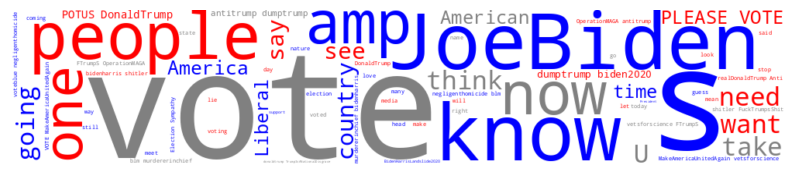

In [101]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(merged_wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for this plot
plt.show()

In [102]:
output_folder = '/content/Visualizations'
os.makedirs(output_folder, exist_ok=True)

In [103]:
# Save the word cloud to a file
output_file_path = os.path.join(output_folder, 'wordcloud.png')
merged_wordcloud.to_file(output_file_path)

In [104]:
# Confirm that the file has been saved
print(f"Word cloud saved to: {output_file_path}")

Word cloud saved to: /content/Visualizations/wordcloud.png
